# Advanced Classification Predict

© Explore Data Science Academy

## Honour Code

I **SIBUSISO KHOZA**, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code (https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Import Libraries and Read In the Data

Do not modify or remove any of the code in these cells.

In [86]:
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=b281f9447c2f777677a0015a4ff20df6bf9658087fcb900b540313fffecec026
  Stored in directory: c:\users\z7541811\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


In [85]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
from IPython import display
from IPython.display import Image, IFrame
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt 
import string
import urllib
import math
from random import randint
import re
import csv
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


# Libraries for NLTK
import nltk
from nltk import TreebankWordTokenizer, PorterStemmer, LancasterStemmer, SnowballStemmer
from nltk.tokenize import word_tokenize, TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Libraries for data prep and classification algorithms
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier as xgb
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Libraries for Performance Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Libraries for model optimisation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import feature_selection
from sklearn.feature_selection import f_classif

#Try Deep Learning
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
#Load datasets
train  = pd.read_csv('train.csv')
test = pd.read_csv('test_with_no_labels.csv')

train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [3]:
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [4]:
train.message[6]

'RT @thenation: Mike Pence doesn’t believe in global warming or that smoking causes lung cancer. https://t.co/gvWYaauU8R'

## Overview

Refer to this diagram to guide you while you build your model. Some of the steps will be fleshed out in this template.

![Overview](process_overview_final.jpg)

## Basic preprocessing

Here is a template you may use for your initial base model. 

### Removing URL's
Write a function that removes URL's from a single tweet. 

**Function input:**
- A single string object (tweet) 

**Function output:**
- The tweet with URL's removed as a single object

In [5]:
def remove_urls(text):
    text = re.sub(r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+', r'url-web', text, flags=re.MULTILINE)
    return text

### Convert to lowercase

Write a function that converts a single tweet to lowercase.

**Function input:**
- A single string object (tweet) 

**Function output:**
- The tweet in lowercase as a single object

In [6]:
def lowerd(text):
    return text.lower()

In [7]:
#Remove Stopwords and Punctuations
def remove_stopwords(text):
    stops = stopwords.words('english')
    return ' '.join([word for word in text.split() if word not in stops])
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [8]:
def tokenized(text):
    tk = TweetTokenizer()
    return tk.tokenize(text)

In [9]:
def lemmad(words):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words] 

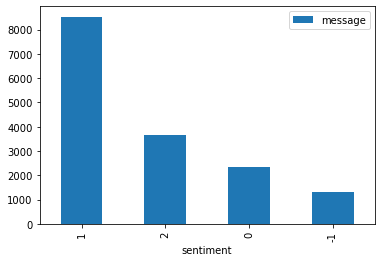

In [10]:
#Check Class Balance
Bars=train[['message','sentiment']].groupby('sentiment').count()
Bars.sort_values('message', ascending=False).plot(kind='bar')
plt.show()

### Apply all cleaning functions

Simply using the pandas apply() method on the data frame

In [11]:
train['message']=train['message'].apply(remove_urls).apply(lowerd).apply(remove_stopwords).apply(remove_punctuations).apply(tokenized).apply(lemmad)

In [12]:
train.message[6]

['rt',
 'thenation',
 'mike',
 'penny',
 'doesn',
 '’',
 't',
 'believe',
 'global',
 'warming',
 'smoking',
 'cause',
 'lung',
 'cancer',
 'urlweb']

### Vectorising 

Vectorise your cleaned data using the vectoriser you defined earlier. Don't forget to fit the vectoriser to the data you just cleaned. Store your vectorised data in `train_vec`.

In [13]:
#Feature exctraction with Term frequency inverse document frequency
Xvector=TfidfVectorizer(preprocessor=list, tokenizer=list,
                        ngram_range=(1,2), 
                        min_df=2,
                        strip_accents="ascii",
                        max_features=10000,
                        smooth_idf=False)

Xvector.fit(train['message'])
X=Xvector.transform(train['message']).toarray()

C:\Users\Z7541811\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [14]:
X.shape

(15819, 10000)

In [15]:
y=train["sentiment"]

In [16]:
y.head()

0    1
1    1
2    2
3    1
4    1
Name: sentiment, dtype: int64

In [17]:
#Train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True,test_size=0.2,random_state=2023)

In [18]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.15321647, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [19]:
y_train

10382    0
7937    -1
12947    2
7467     2
14145    0
        ..
6049     1
2743     1
14790    1
5657    -1
4951    -1
Name: sentiment, Length: 12655, dtype: int64

## Fitting a simple model on training data and evaluate its performance

Fit a model on your cleaned data. Use `train_vec` as your features. Note that you need to convert `train_vec` to an array. 

You are familiar with this process, so there is less guidance here. You may also refer to train notebooks and the webinar pdf as guidance.

Your basic model should be a logistic regression, however if you try different models you will also perform the following procedure.

1. Split the training data into features and labels.
2. Split the training data further into training and validation data.
3. Fit the model on the training subset. 
4. Predict on the validation subset.
5. Calculate the performance metrics on the validation predictions.
6. Select a model based on validation performance (when you have more than one model).
8. Clean the test data.
9. Predict on the cleaned test data.
7. Write a csv that matches `sample_submission.csv`.
8. Submit to Kaggle.

In [20]:
#Base_Logistic_Regression
lr_base=LogisticRegression(multi_class='ovr')
lr_base.fit(X_train,y_train)
lrb_pred= lr_base.predict(X_test)

In [21]:
f1_score(y_test, lrb_pred, average="macro")

0.6007020546324652

In [22]:
#Logistic_Regression2
lr2=LogisticRegression(multi_class='ovr', verbose = 1, C=7)
lr2.fit(X_train,y_train)
lr2_pred= lr_base.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Z7541811\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Z7541811\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation 

In [23]:
f1_score(y_test, lr2_pred, average="macro")

0.6007020546324652

In [25]:
#Tune_Logistic_Regression using RandomGrid SearchCV
Solver=["lbfgs","liblinear"]
Cs=[int(x) for x in range(1,11,1)]
verbosey=[0.1,1,10]
# Create the randomgrid
random_grid = {'solver': Solver,
               'C': Cs,
               'verbose': verbosey}

In [26]:
tlr = LogisticRegression(multi_class='ovr')
lrt = RandomizedSearchCV(estimator = tlr,
                         param_distributions = random_grid,
                         n_iter =8,
                         cv = 3,
                         n_jobs = -1,
                         error_score="raise",
                         random_state=2023)

lrt.fit(X_train, y_train)

[LibLinear]

RandomizedSearchCV(cv=3, error_score='raise',
                   estimator=LogisticRegression(multi_class='ovr'), n_iter=8,
                   n_jobs=-1,
                   param_distributions={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                                        'solver': ['lbfgs', 'liblinear'],
                                        'verbose': [0.1, 1, 10]},
                   random_state=2023)

In [27]:
lrt_pred= lrt.predict(X_test)
f1_score(y_test, lrt_pred, average="macro")

0.6753418855900009

In [ ]:
#Ridge

In [42]:
Rclf=RidgeClassifier()
Rclf.fit(X_train, y_train)

RidgeClassifier()

In [43]:
Rcf_pred= Rclf.predict(X_test)
f1_score(y_test, Rcf_pred, average="macro")

0.6712841386889433

In [46]:
svc=SVC(kernel = 'linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [48]:
sv_pred= svc.predict(X_test)
f1_score(y_test, sv_pred, average="macro")

0.6756354073274011

In [ ]:
#XGBoost

In [59]:
boost=xgb()
boost.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:23:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [60]:
xg_pred= boost.predict(X_test)
f1_score(y_test, xg_pred, average="macro")

0.5900914189445687

In [ ]:
#KNN

In [61]:
KNN=KNeighborsClassifier(n_neighbors=100)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [62]:
k_pred= KNN.predict(X_test)
f1_score(y_test, k_pred, average="macro")

0.46709034016235984

In [76]:
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('knn', KNeighborsClassifier(n_neighbors=100)))
    level0.append(('RFR', RandomForestClassifier(max_depth=100)))
    level0.append(('xgb', xgb()))
    # define meta learner model
    level1 = LogisticRegression(multi_class='ovr')
    # define the stacking ensemble.0
    custom = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return custom

In [77]:
stacker = get_stacking()
stacker.fit(X_train, y_train)

[16:30:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:51:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:57:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

StackingClassifier(cv=5,
                   estimators=[('knn', KNeighborsClassifier(n_neighbors=100)),
                               ('RFR', RandomForestClassifier(max_depth=100)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              enable_categorical=False,
                                              gamma=None, gpu_id=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learnin...
                                              max_delta_step=None,
                                              max_depth=None,
                    

In [78]:
stk_pred= stacker.predict(X_test)
f1_score(y_test, stk_pred, average="macro")

0.6322645714295669

In [80]:
def get_voting():
    # define the base models
    level0 = list()
    level0.append(('knn', KNeighborsClassifier(n_neighbors=100)))
    level0.append(('RFR', RandomForestClassifier(max_depth=100)))
    level0.append(('xgb', xgb()))
    # define meta learner model
    # define the stacking ensemble
    custom2 = VotingClassifier(estimators=level0)
    return custom2

In [81]:
voter = get_voting()
voter.fit(X_train, y_train)

[17:25:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=100)),
                             ('RFR', RandomForestClassifier(max_depth=100)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            enable_categorical=False,
                                            gamma=None, gpu_id=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                            

In [82]:
vot_pred= voter.predict(X_test)
f1_score(y_test, vot_pred, average="macro")

0.5657171966371097

In [44]:
confusion_matrix(y_test,Rcf_pred)

array([[ 116,   31,  124,   12],
       [  11,  196,  199,   34],
       [   8,   60, 1501,  127],
       [   4,    8,  143,  590]], dtype=int64)

In [45]:
confusion_matrix(y_test,lrt_pred)

array([[ 118,   35,  118,   12],
       [  14,  208,  187,   31],
       [  12,   72, 1494,  118],
       [   3,    9,  145,  588]], dtype=int64)

In [ ]:
labels=["1:Pro","2:MorePro","0:Neutral","-1:Anti"]
pd.DataFrame(data=confusion_matrix(y_test, Rcf_pred), index=labels, columns=labels)

In [28]:
#TRANSFORM THE TEST DATA
test['message']=test['message'].apply(remove_urls).apply(lowerd).apply(remove_stopwords).apply(remove_punctuations).apply(tokenized).apply(lemmad)

In [29]:
test.message[1]

['combine',
 'polling',
 'staffer',
 'climate',
 'change',
 'woman',
 'right',
 'fascist',
 'state',
 'urlweb']

In [30]:
test.head

<bound method NDFrame.head of                                                  message  tweetid
0      [europe, looking, china, make, sure, alone, fi...   169760
1      [combine, polling, staffer, climate, change, w...    35326
2      [scary, unimpeachable, evidence, climate, chan...   224985
3      [karoli, morgfair, osborneink, dailykos, putin...   476263
4      [rt, fakewillmoore, female, orgasm, cause, glo...   872928
...                                                  ...      ...
10541  [rt, brittanybohrer, brb, writing, poem, clima...   895714
10542  [2016, year, climate, change, came, home, hott...   875167
10543  [rt, loopvanuatu, pacific, country, positive, ...    78329
10544  [rt, xanria, 00018, you, ’, re, hot, must, cau...   867455
10545  [rt, chloebalaoing, climate, change, global, i...   470892

[10546 rows x 2 columns]>

In [31]:
X_test1=Xvector.transform(test['message']).toarray()

In [32]:
X_test1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [68]:
predStack=stacker.predict(X_test1)

In [69]:
predStack_submit=pd.DataFrame(predStack)

In [70]:
predStack_submit.head

<bound method NDFrame.head of        0
0      1
1      1
2      1
3      1
4      0
...   ..
10541  1
10542  1
10543  2
10544  0
10545  1

[10546 rows x 1 columns]>

In [71]:
ids_submit = test[['tweetid']]

In [72]:
ids_submit

,tweetid
0,169760
1,35326
2,224985
3,476263
4,872928
...,...
10541,895714
10542,875167
10543,78329
10544,867455


In [73]:
submit_allStack= pd.concat([ids_submit.reset_index(drop=True), predStack_submit], axis=1).rename(columns = {0:'sentiment'})
submit_allStack.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,0


## Submit your best model predictions 

Don't forget to submit your the predictions on the best model to Kaggle.

In [74]:
# write csv for best predictions
submit_allStack[['tweetid','sentiment']].to_csv('StackTestsubmission.csv', index=False)
